# 3D Failures detection model based on Yolov5

The idea is detect failures in a 3D printing process. This model detect the part that is been printing, the extrusor, some errors and if there is a spaghetti error type.

In [1]:
pip install huggingface_hub

In [2]:
pip install datasets

# How to use
## Download the model

In [3]:
from huggingface_hub import hf_hub_download
import torch

repo_id = "Javiai/3dprintfails-yolo5vs"
filename = "model_torch.pt"

model_path = hf_hub_download(repo_id=repo_id, filename=filename)


# Combine with the original model


In [4]:
model = torch.hub.load('Ultralytics/yolov5', 'custom', model_path, verbose = False)

YOLOv5 🚀 2024-5-9 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Prepare an image
## From the original dataset

In [5]:
from datasets import load_dataset

dataset = load_dataset('Javiai/failures-3D-print')

image = dataset["train"][0]["image"]

Generating train split:   0%|          | 0/73 [00:00<?, ? examples/s]

# From local

In [7]:
from PIL import Image
image = Image.open("/content/WhatsApp Image 2024-05-09 at 3.50.29 PM.jpeg")


# Inference and show the detection

WARNING ⚠️ NMS time limit 0.550s exceeded


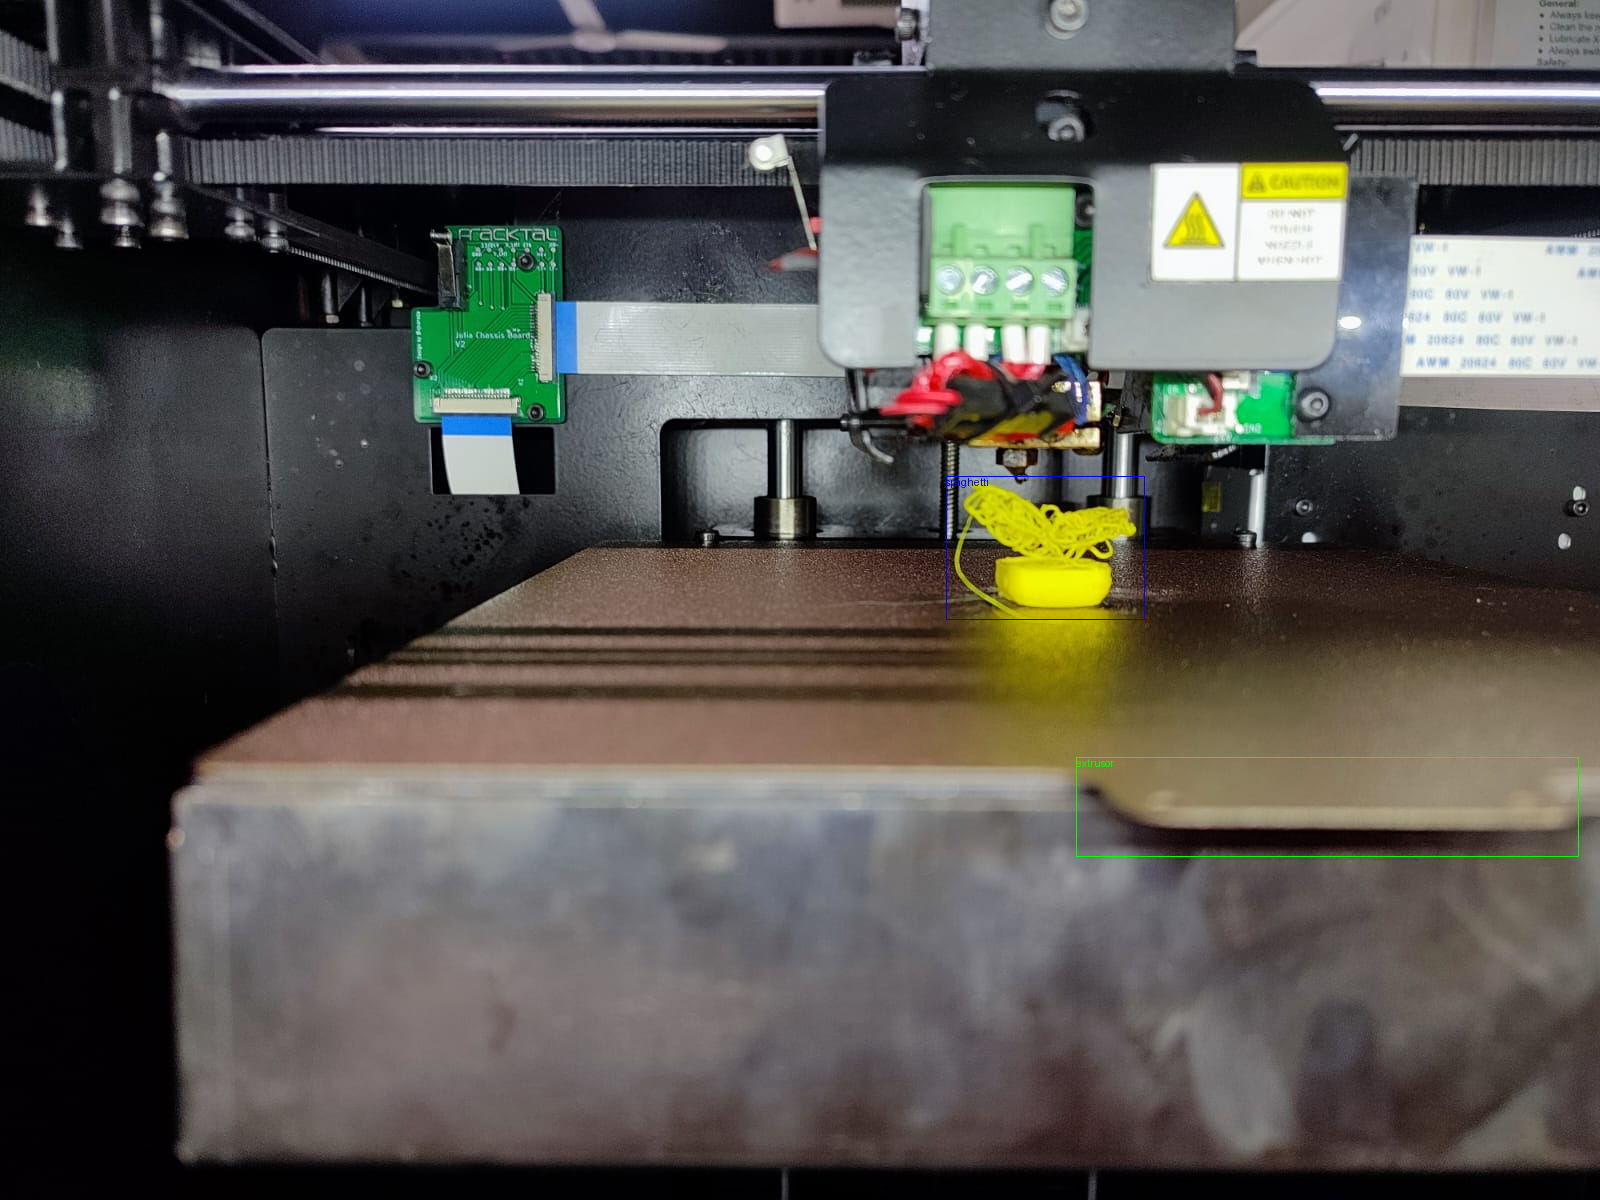

In [8]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

detections = model(image)

categories = [
  {'name': 'error', 'color': (0,0,255)},
  {'name': 'extrusor', 'color': (0,255,0)},
  {'name': 'part', 'color': (255,0,0)},
  {'name': 'spaghetti', 'color': (0,0,255)}
]

for detection in detections.xyxy[0]:
  x1, y1, x2, y2, p, category_id = detection
  x1, y1, x2, y2, category_id = int(x1), int(y1), int(x2), int(y2), int(category_id)
  draw.rectangle((x1, y1, x2, y2),
                 outline=categories[category_id]['color'],
                 width=1)
  draw.text((x1, y1), categories[category_id]['name'],
            categories[category_id]['color'])

image

In [11]:
from PIL import Image
image = Image.open("/content/WhatsApp Image 2024-05-09 at 3.50.31 PM.jpeg")

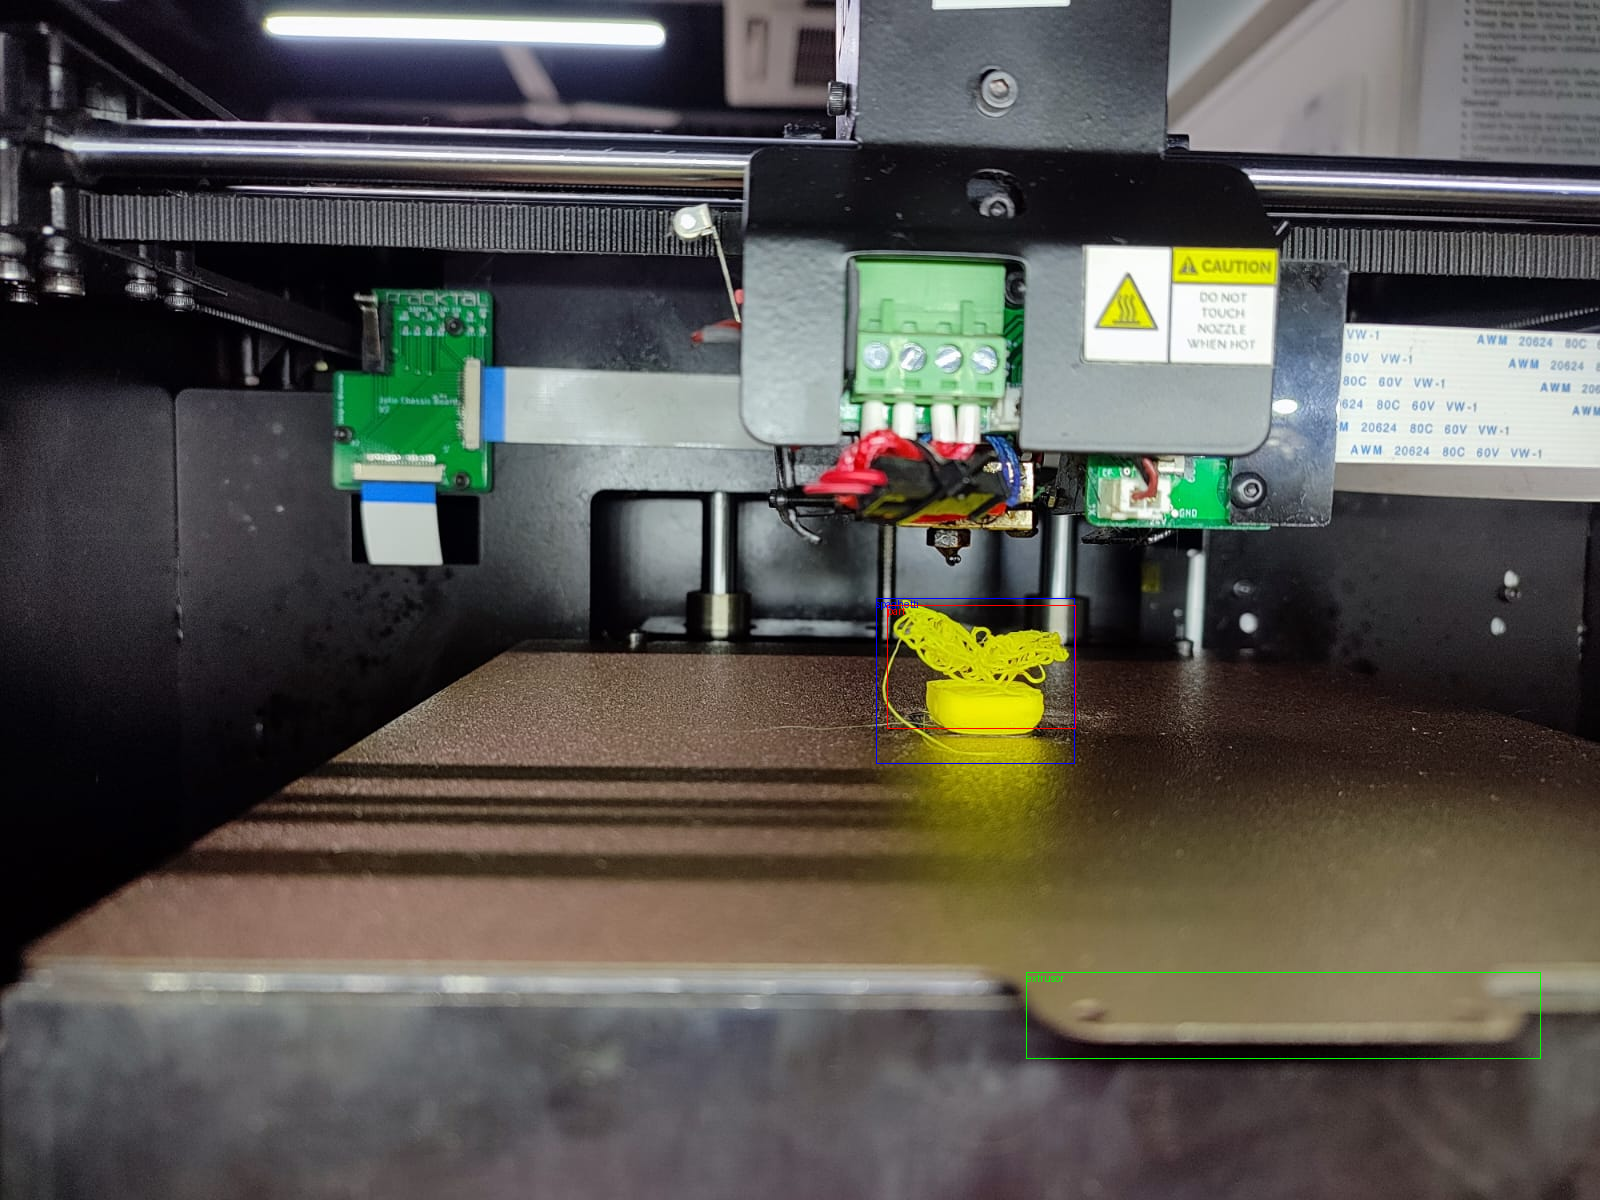

In [12]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

detections = model(image)

categories = [
  {'name': 'error', 'color': (0,0,255)},
  {'name': 'extrusor', 'color': (0,255,0)},
  {'name': 'part', 'color': (255,0,0)},
  {'name': 'spaghetti', 'color': (0,0,255)}
]

for detection in detections.xyxy[0]:
  x1, y1, x2, y2, p, category_id = detection
  x1, y1, x2, y2, category_id = int(x1), int(y1), int(x2), int(y2), int(category_id)
  draw.rectangle((x1, y1, x2, y2),
                 outline=categories[category_id]['color'],
                 width=1)
  draw.text((x1, y1), categories[category_id]['name'],
            categories[category_id]['color'])

image